<a href="https://colab.research.google.com/github/TNK443/RecPadroes/blob/main/03_Generalizacao_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avaliando a Generalização de Algoritmos**

1) Escolha uma base de classificação e compare os classificadores Logistic Regression e KNN do scikit-learn.

1.1) Use pelo menos duas formas de avaliação e as repita pelo menos 10 vezes.

1.2) Calcule a média das repetições de cada avaliação.



## **[COFING]**

In [1]:
# ================================================================================
#                               BIBLIOTECAS
# ================================================================================
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import csv

# BASE IMPORTADA
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_lfw_pairs
from sklearn.datasets import fetch_covtype

# METRICAS
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error

# PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

# PIPELINE
from sklearn.pipeline import Pipeline

# GRIDSEARCH
from sklearn.model_selection import GridSearchCV

# CLASSIFICADORES
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# ================================================================================

## **1) Escolha uma base de classificação...**
*(5 BASES para escolher: 4 SKLearn e 1 UCI)*

*(Para alternar/escolher as bases SKLearn, deve-se tirar um do comentário e colocar o atual como comentado.)*

### BASE SCIKIT-LEARN

In [2]:
# ================================================================================
#                            CARREGANDO BASE SCIKIT-LEARN
# ================================================================================
# --------------------------------------------------------------------------------
# baseSKL = load_wine()
baseSKL = load_breast_cancer()
# baseSKL = fetch_covtype()
# baseSKL = fetch_lfw_pairs()

clear_output()

Xb1, yb1 = baseSKL.data, baseSKL.target

# print()
print('=' * 100)

print('-' * 80)
print("[SKLEARN.DATASETS]")
print("(base classification)")
print()
print("KEYS:", baseSKL.keys(), "\n")
print("X.shape:", Xb1.shape, " || ", "y.shape:", yb1.shape, " || ", "Classe(set(y)):", set(yb1))
print()
print('-' * 80)

print('=' * 100)
# --------------------------------------------------------------------------------

--------------------------------------------------------------------------------
[SKLEARN.DATASETS]
(base classification)

KEYS: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']) 

X.shape: (569, 30)  ||  y.shape: (569,)  ||  Classe(set(y)): {0, 1}

--------------------------------------------------------------------------------


In [3]:
print(baseSKL.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

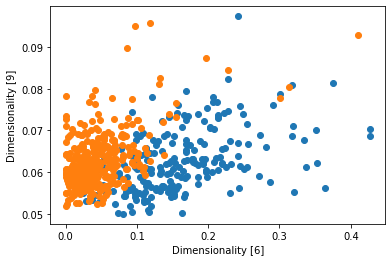

In [4]:
# --------------------------------------------------------------------------------
i, j = 6, 9

plt.xlabel(f"Dimensionality [{i}]")
# plt.xlabel(f"{i}: {baseSKL.feature_names[i]}")

plt.ylabel(f"Dimensionality [{j}]")
# plt.ylabel(f"{j}: {baseSKL.feature_names[j]}")

for k in set(yb1):
    plt.plot(Xb1[:,i][yb1==k], Xb1[:,j][yb1==k], "o")
    # plt.plot(Xb1[:,i][yb1==k], Xb1[:,j][yb1==k], "o", label=f"{baseSKL.target_names[k]}")

# plt.legend()
plt.show()
# --------------------------------------------------------------------------------

In [5]:
# --------------------------------------------------------------------------------
# ================================================================================

### BASE HEART BISEASE UCI

In [6]:
# ================================================================================
#                            CARREGANDO BASE HEART BISEASE UCI
# ================================================================================
# Base dados Heart Disease UCI: https://www.kaggle.com/ronitf/heart-disease-uci
# --------------------------------------------------------------------------------
#                         Carrega e Inicializa os DADOS necessários.
# --------------------------------------------------------------------------------

!rm -r *.*
!rm -r sample_data
!rm -r DataSet

# --------------------------------------------------------------------------------
!git clone https://github.com/TNK443/DataSet/
!rm -r /content/DataSet/README.md
# --------------------------------------------------------------------------------

clear_output()

print('ARQUIVOS CARREGADOS COM SUCESSO.')

# --------------------------------------------------------------------------------

ARQUIVOS CARREGADOS COM SUCESSO.


In [7]:
# ================================================================================
#---------------------------------------------------------------------------------
# PASSO 1. Separar os dados em uma matriz de features (dados de entrada) e um vetor
#          coluna com as classes (última coluna – “target” – do arquivo csv).
#
targetList = []
featuresList = []
featuresListMAX = []
featuresListMIN = []

with open ('/content/DataSet/heart.csv', 'r') as heart:
  dataCSV = csv.reader(heart)

  next(dataCSV)
  for line in dataCSV:
      featuresList.append(line[:13])
      targetList.append(line[13:])

# Transforma a targetList em um Vetor/Lista de Interos
aux = np.array(targetList).reshape(-1)
targetList = list(map(int, aux))

#---------------------------------------------------------------------------------
# PASSO 2. Normalizar a matriz de features de forma que os valores das colunas
#          estejam no intervalo [0, 1]. Essa transformação é importante para que a
#          contribuição de todas as características seja aproximadamente a mesma.
#          Além disso, alguns classificadores como as redes neurais funcionam melhor 
#          com dados neste intervalo.
#
# Inicializa as Listas MAX/MIN com a primeira linha.
featuresListMIN = (list(map(float, featuresList[0])))
featuresListMAX = (list(map(float, featuresList[0])))

# Transforma a Matriz de Features em um Vetor/Lista.
aux = np.array(featuresList).reshape(-1)
aux = list(map(float, aux))

# Pecorre todo a Lista e identifica o MAX e MIN de cada Coluna.
count = 0
for i in aux:
    if (featuresListMAX[(count % 13)] < i): featuresListMAX[(count % 13)] = i
    if (featuresListMIN[(count % 13)] > i): featuresListMIN[(count % 13)] = i
    count += 1

# Ajusta o MAX de acordo com o MIN.
for i in range(13):
  featuresListMAX[i] = featuresListMAX[i] - featuresListMIN[i] 

# print(featuresListMIN)
# print(featuresListMAX)

# Pecorre todo a Lista e para realizar o tratamento com o MIN e MAX.
count = 0
auxList = []
featuresListNORM = []
for i in aux:
  auxList.append((i - featuresListMIN[count])/featuresListMAX[count])
  count += 1
  if (count == 13):
      featuresListNORM.append(auxList)
      auxList = []
      count = 0

# Cria um Index para Controle
index = list(range(len(featuresListNORM)))
#---------------------------------------------------------------------------------

In [8]:
#---------------------------------------------------------------------------------
Xb2, yb2 = np.array(featuresListNORM), np.array(targetList)

# print()
print('=' * 100)

print('-' * 80)
print("[BASE HEART BISEASE UCI]")
print()
print("X.shape:", Xb2.shape, " || ", "y.shape:", yb2.shape, " || ", "Classe(set(y)):", set(yb2))
print()
print('-' * 80)

print('=' * 100)
# --------------------------------------------------------------------------------

--------------------------------------------------------------------------------
[BASE HEART BISEASE UCI]

X.shape: (303, 13)  ||  y.shape: (303,)  ||  Classe(set(y)): {0, 1}

--------------------------------------------------------------------------------


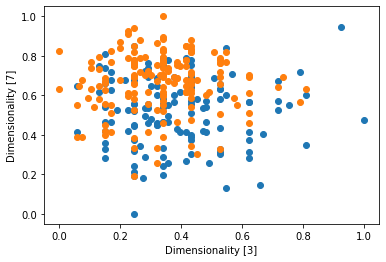

In [9]:
# --------------------------------------------------------------------------------
i, j = 3, 7

plt.xlabel(f"Dimensionality [{i}]")
plt.ylabel(f"Dimensionality [{j}]")

for k in set(yb2):
    plt.plot(Xb2[:,i][yb2==k], Xb2[:,j][yb2==k], "o")

plt.show()
# --------------------------------------------------------------------------------

## **...compare os classificadores Logistic Regression e KNN do scikit-learn.**

*(Aqui, deve-se escolher entre a BASE SKLEARN ou UCI para fazer a comparação dos Classificadores.)*

In [10]:
# ================================================================================
#                              SELEÇÃO DA BASE
# ================================================================================

# BASE SCIKIT-LEARN
X, y = Xb1, yb1

# BASE HEART BISEASE UCI
# X, y = Xb2, yb2
# ================================================================================

**OBS.**

Professor, segue algumas observações para a execução da atividade:

> **a.** Foi utilizado uma lista de 10 HyperParâmetros para execução do Cross_Validation.
> 
> **b.** Foi utilizado a comparação de 04 tipos de Avaliações (*Use pelo menos duas formas de avaliação*):
>
>> 1) AVALIAÇÃO 01: **COM** GRIDSEARCH(PIPELINE) **COM** PADRONIZAÇÃO
>>
>> 2) AVALIAÇÃO 02: **COM** GRIDSEARCH(PIPELINE) ***SEM*** PADRONIZAÇÃO
>>
>> 3) AVALIAÇÃO 03: ***SEM*** GRIDSEARCH(PIPELINE) **COM** PADRONIZAÇÃO
>>
>> 4) AVALIAÇÃO 04: ***SEM*** GRIDSEARCH(PIPELINE) ***SEM*** PADRONIZAÇÃO













In [11]:
# ================================================================================
#                       AVALIAÇÃO COM GRIDSEARCH(PIPELINE)
# ================================================================================

#---------------------------------------------------------------------------------
#               AVALIAÇÃO 01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO
#---------------------------------------------------------------------------------
pipelineLGR_c = Pipeline([
                        ("padronizacao", StandardScaler()),
                        ("lgr", LogisticRegression())
                        ])
parametros = {'lgr__max_iter':[10,20,30,40,60,80,100,110,120,140]}
modeloLGR = GridSearchCV(pipelineLGR_c, parametros,
                         scoring='accuracy'
                        )


pipelineKNN_c = Pipeline([
                        ("padronizacao", StandardScaler()),
                        ("knn", KNeighborsClassifier())
                        ])
parametros = {'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
modeloKNN = GridSearchCV(pipelineKNN_c, parametros,
                         scoring='accuracy'
                        )

# AVALIAÇÃO 01
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=2020)
scoresLGR_c = cross_validate(modeloLGR, X, y, cv=rkf,
                           scoring=make_scorer(accuracy_score)
                          )

scoresKNN_c = cross_validate(modeloKNN, X, y, cv=rkf,
                           scoring=make_scorer(accuracy_score)
                          )

AVG_LGR_com_padr = np.mean(scoresLGR_c['test_score'])
AVG_KNN_com_padr = np.mean(scoresKNN_c['test_score'])

m1GP = AVG_LGR_com_padr
m2GP = AVG_KNN_com_padr

clear_output()
print("AVALIAÇÃO 01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO")
print("EXECUÇÃO FINALIZADA!")
#---------------------------------------------------------------------------------

AVALIAÇÃO 01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO
EXECUÇÃO FINALIZADA!


In [12]:
#---------------------------------------------------------------------------------
#               AVALIAÇÃO 02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO
#---------------------------------------------------------------------------------
pipelineLGR_s = Pipeline([
                          ("lgr", LogisticRegression())
                        ])
parametros = {'lgr__max_iter':[10,20,30,40,60,80,100,110,120,140]}
modeloLGR = GridSearchCV(pipelineLGR_s, parametros,
                         scoring='accuracy'
                        )


pipelineKNN_s = Pipeline([
                          ("knn", KNeighborsClassifier())
                          ])
parametros = {'knn__n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
modeloKNN = GridSearchCV(pipelineKNN_s, parametros,
                         scoring='accuracy'
                        )

# AVALIAÇÃO 02
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=2020)
scoresLGR_s = cross_validate(modeloLGR, X, y, cv=rkf,
                           scoring=make_scorer(accuracy_score)
                          )

scoresKNN_s = cross_validate(modeloKNN, X, y, cv=rkf,
                           scoring=make_scorer(accuracy_score)
                          )


AVG_LGR_sem_padr = np.mean(scoresLGR_s['test_score'])
AVG_KNN_sem_padr = np.mean(scoresKNN_s['test_score'])

m3GP = AVG_LGR_sem_padr
m4GP = AVG_KNN_sem_padr

clear_output()

print("AVALIAÇÃO 02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO")
print("EXECUÇÃO FINALIZADA!")
#---------------------------------------------------------------------------------

AVALIAÇÃO 02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO
EXECUÇÃO FINALIZADA!


In [13]:
#---------------------------------------------------------------------------------
#              APRESENTAR RESULTADOS DA AVALIAÇÃO 01 E 02
#---------------------------------------------------------------------------------
np.set_printoptions(precision=2, linewidth=51)

print('='*60)
print('-'*60)
print("AVALIAÇÃO 01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO:")
print('-'*60,"\n")

print("Scores LGR:\n", (scoresLGR_c['test_score']))
print()
print("Scores KNN:\n", (scoresKNN_c['test_score']))
print()

print()
print("Média LGR = ", AVG_LGR_com_padr)
print("Média KNN = ", AVG_KNN_com_padr)
print()
print('='*60)


print()
print()
print()

print('='*60)
print('-'*60)
print("AVALIAÇÃO 02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO:")
print('-'*60,"\n")

print("Scores LGR:\n", scoresLGR_s['test_score'])
print()
print("Scores KNN:\n", scoresKNN_s['test_score'])
print()

print()
print("Média LGR = ", AVG_LGR_sem_padr)
print("Média KNN = ", AVG_KNN_sem_padr)
print()
print('='*60)
#---------------------------------------------------------------------------------

------------------------------------------------------------
AVALIAÇÃO 01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO:
------------------------------------------------------------ 

Scores LGR:
 [1.   0.95 0.96 0.96 0.98 0.95 1.   1.   0.98 1.
 1.   0.96 0.98 1.   0.98 0.98 0.98 0.96 1.   0.96
 1.   0.98 0.95 0.95 0.96 0.98 0.98 1.   0.96 0.98
 0.98 0.96 1.   0.98 0.98 0.98 0.95 1.   0.96 0.98
 0.98 0.98 0.96 0.96 0.98 0.98 0.96 0.98 0.98 1.
 1.   0.98 0.96 0.98 1.   0.96 1.   0.98 0.98 0.96
 1.   0.95 0.96 0.96 1.   0.95 0.98 0.98 0.98 1.
 0.96 1.   0.95 0.96 0.98 0.96 0.98 1.   0.98 1.
 0.98 0.98 0.96 0.98 0.95 0.96 1.   0.98 0.98 0.98
 0.96 0.96 0.98 0.96 1.   1.   0.96 1.   0.96 1.  ]

Scores KNN:
 [0.95 0.95 0.98 0.96 0.98 0.95 0.98 1.   0.96 0.96
 0.95 0.98 0.96 0.98 0.96 0.93 0.96 0.96 0.98 0.96
 0.98 0.93 0.93 0.96 0.93 0.96 0.96 1.   0.98 1.
 0.98 0.95 0.96 0.98 0.98 0.98 0.96 0.98 0.93 0.93
 1.   0.96 0.96 0.95 0.93 0.98 0.95 0.91 0.98 1.
 0.98 0.96 0.98 0.95 0.95 0.96 0.96 0.

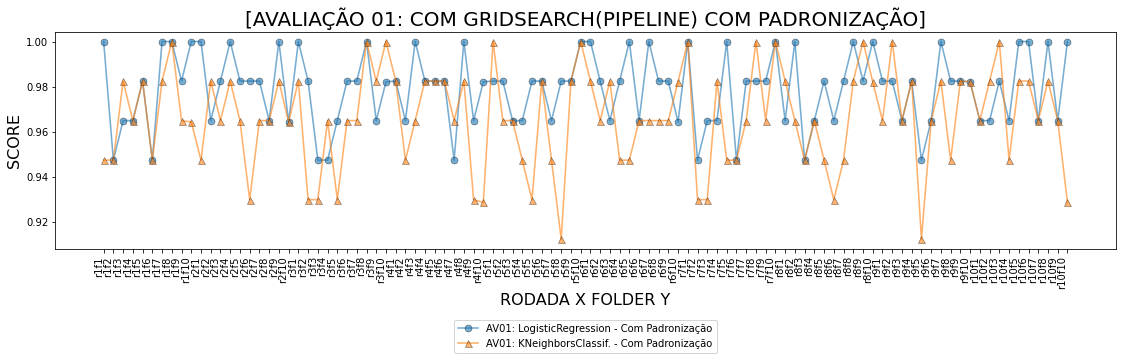

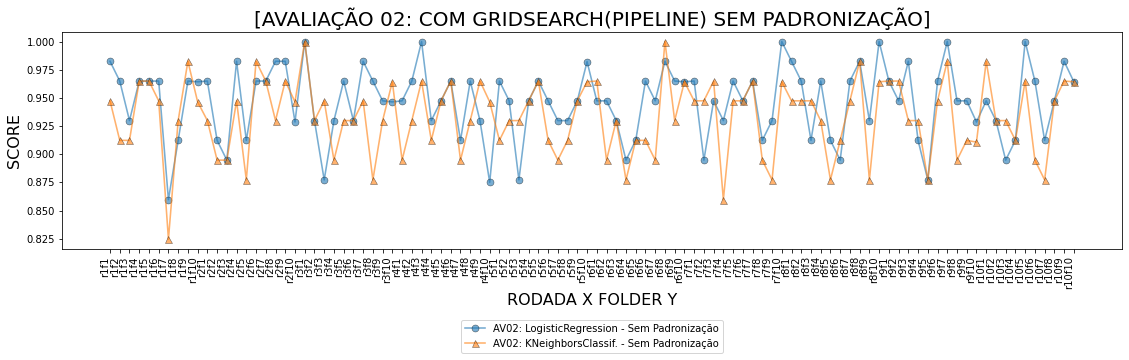

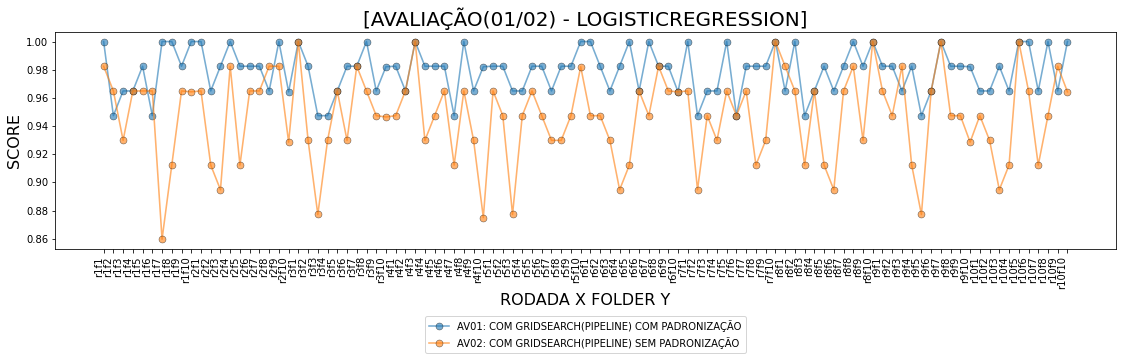

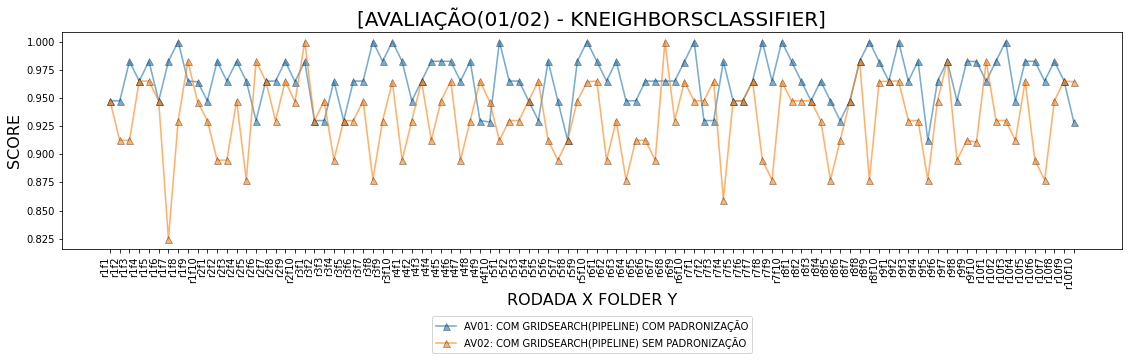

In [14]:
#---------------------------------------------------------------------------------
# GRAFICOS PARA A AVALIAÇÃO 01 E 02
#---------------------------------------------------------------------------------
margem = 130
tamanho=(19,4)

y0  = ['r1f1', 'r1f2', 'r1f3', 'r1f4', 'r1f5', 'r1f6', 'r1f7', 'r1f8', 'r1f9', 'r1f10',
       'r2f1', 'r2f2', 'r2f3', 'r2f4', 'r2f5', 'r2f6', 'r2f7', 'r2f8', 'r2f9', 'r2f10',
       'r3f1', 'r3f2', 'r3f3', 'r3f4', 'r3f5', 'r3f6', 'r3f7', 'r3f8', 'r3f9', 'r3f10',
       'r4f1', 'r4f2', 'r4f3', 'r4f4', 'r4f5', 'r4f6', 'r4f7', 'r4f8', 'r4f9', 'r4f10',
       'r5f1', 'r5f2', 'r5f3', 'r5f4', 'r5f5', 'r5f6', 'r5f7', 'r5f8', 'r5f9', 'r5f10',
       'r6f1', 'r6f2', 'r6f3', 'r6f4', 'r6f5', 'r6f6', 'r6f7', 'r6f8', 'r6f9', 'r6f10',
       'r7f1', 'r7f2', 'r7f3', 'r7f4', 'r7f5', 'r7f6', 'r7f7', 'r7f8', 'r7f9', 'r7f10',
       'r8f1', 'r8f2', 'r8f3', 'r8f4', 'r8f5', 'r8f6', 'r8f7', 'r8f8', 'r8f9', 'r8f10',
       'r9f1', 'r9f2', 'r9f3', 'r9f4', 'r9f5', 'r9f6', 'r9f7', 'r9f8', 'r9f9', 'r9f10',
       'r10f1', 'r10f2', 'r10f3', 'r10f4', 'r10f5', 'r10f6', 'r10f7', 'r10f8', 'r10f9', 'r10f10']

x1GP = scoresLGR_c['test_score']
x2GP = scoresKNN_c['test_score']
x3GP = scoresLGR_s['test_score']
x4GP = scoresKNN_s['test_score']

print('='*margem)
#---------------------------------------------------------------------------------
plt.figure(figsize=tamanho)
plt.title('[AVALIAÇÃO 01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO]', fontsize=20)

ax = plt.gca()
ax.set_xticklabels(y0, rotation=90, ha='right')

plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("RODADA X FOLDER Y", fontsize=16)

plt.plot(y0, x1GP, linewidth=1.6, linestyle='-', label='AV01: LogisticRegression - Com Padronização', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x2GP, linewidth=1.6, linestyle='-', label='AV01: KNeighborsClassif. - Com Padronização', marker='^', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))
plt.show()
#---------------------------------------------------------------------------------
print()
print('='*margem)
print()
print('='*margem)
#---------------------------------------------------------------------------------
plt.figure(figsize=tamanho)
plt.title('[AVALIAÇÃO 02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO]', fontsize=20)

ax = plt.gca()
ax.set_xticklabels(y0, rotation=90, ha='right')

plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("RODADA X FOLDER Y", fontsize=16)

plt.plot(y0, x3GP, linewidth=1.6, linestyle='-', label='AV02: LogisticRegression - Sem Padronização', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x4GP, linewidth=1.6, linestyle='-', label='AV02: KNeighborsClassif. - Sem Padronização', marker='^', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))
plt.show()
#---------------------------------------------------------------------------------
print()
print('='*margem)
print()
print('='*margem)
#---------------------------------------------------------------------------------
plt.figure(figsize=tamanho)
plt.title('[AVALIAÇÃO(01/02) - LOGISTICREGRESSION]', fontsize=20)

ax = plt.gca()
ax.set_xticklabels(y0, rotation=90, ha='right')

plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("RODADA X FOLDER Y", fontsize=16)

plt.plot(y0, x1GP, linewidth=1.6, linestyle='-', label='AV01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x3GP, linewidth=1.6, linestyle='-', label='AV02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))
plt.show()
#---------------------------------------------------------------------------------
print()
print('='*margem)
print()
print('='*margem)
#---------------------------------------------------------------------------------
plt.figure(figsize=tamanho)
plt.title('[AVALIAÇÃO(01/02) - KNEIGHBORSCLASSIFIER]', fontsize=20)

ax = plt.gca()
ax.set_xticklabels(y0, rotation=90, ha='right')

plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("RODADA X FOLDER Y", fontsize=16)

plt.plot(y0, x2GP, linewidth=1.6, linestyle='-', label='AV01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO', marker='^', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x4GP, linewidth=1.6, linestyle='-', label='AV02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO', marker='^', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))
plt.show()
#---------------------------------------------------------------------------------
print()
print('='*margem)
print()
# ================================================================================

In [15]:
# ================================================================================
#                         AVALIAÇÃO SEM PIPELINE/GRIDSEARCH
# ================================================================================

#---------------------------------------------------------------------------------
#               AVALIAÇÃO 03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO
#---------------------------------------------------------------------------------
scaler = StandardScaler()
X_new = scaler.fit_transform(X) # X padronizado

modeloLGR = LogisticRegression()
modeloLGR.fit(X_new,y)

modeloKNN = KNeighborsClassifier()
modeloKNN.fit(X_new, y)

# AVALIAÇÃO 03
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=2020)
scoresLGR_c = cross_validate(modeloLGR, X_new, y, cv=rkf,
                           scoring=make_scorer(accuracy_score)
                          )

scoresKNN_c = cross_validate(modeloKNN, X_new, y, cv=rkf,
                           scoring=make_scorer(accuracy_score)
                          )

AVG_LGR_com_padr = np.mean(scoresLGR_c['test_score'])
AVG_KNN_com_padr = np.mean(scoresKNN_c['test_score'])

m1 = AVG_LGR_com_padr
m2 = AVG_KNN_com_padr

clear_output()

print("AVALIAÇÃO 03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO")
print("EXECUÇÃO FINALIZADA!")
#---------------------------------------------------------------------------------

AVALIAÇÃO 03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO
EXECUÇÃO FINALIZADA!


In [16]:
#---------------------------------------------------------------------------------
#               AVALIAÇÃO 04: SEM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO
#---------------------------------------------------------------------------------
modeloLGR = LogisticRegression()
modeloLGR.fit(X,y)

modeloKNN = KNeighborsClassifier()
modeloKNN.fit(X, y)

# AVALIAÇÃO 04
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=2020)
scoresLGR_s = cross_validate(modeloLGR, X, y, cv=rkf,
                           scoring=make_scorer(accuracy_score)
                          )

scoresKNN_s = cross_validate(modeloKNN, X, y, cv=rkf,
                           scoring=make_scorer(accuracy_score)
                          )

AVG_LGR_sem_padr = np.mean(scoresLGR_s['test_score'])
AVG_KNN_sem_padr = np.mean(scoresKNN_s['test_score'])

m3 = AVG_LGR_sem_padr
m4 = AVG_KNN_sem_padr

clear_output()

print("AVALIAÇÃO 04: SEM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO")
print("EXECUÇÃO FINALIZADA!")
#---------------------------------------------------------------------------------

AVALIAÇÃO 04: SEM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO
EXECUÇÃO FINALIZADA!


In [17]:
#---------------------------------------------------------------------------------
#              APRESENTAR RESULTADOS DA AVALIAÇÃO 03 E 04
#---------------------------------------------------------------------------------
np.set_printoptions(precision=2, linewidth=51)

print('='*60)
print('-'*60)
print("AVALIAÇÃO 03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO:")
print('-'*60,"\n")

print("Scores LGR:\n", (scoresLGR_c['test_score']))
print()
print("Scores KNN:\n", (scoresKNN_c['test_score']))
print()

print()
print("Média LGR = ", AVG_LGR_com_padr)
print("Média KNN = ", AVG_KNN_com_padr)
print()
print('='*60)


print()
print()
print()

print('='*60)
print('-'*60)
print("AVALIAÇÃO 04: SEM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO:")
print('-'*60,"\n")

print("Scores LGR:\n", scoresLGR_s['test_score'])
print()
print("Scores KNN:\n", scoresKNN_s['test_score'])
print()

print()
print("Média LGR = ", AVG_LGR_sem_padr)
print("Média KNN = ", AVG_KNN_sem_padr)
print()
print('='*60)
#---------------------------------------------------------------------------------

------------------------------------------------------------
AVALIAÇÃO 03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO:
------------------------------------------------------------ 

Scores LGR:
 [1.   0.95 0.96 0.96 0.98 0.95 1.   1.   0.98 1.
 1.   0.98 0.98 1.   0.98 0.98 0.98 0.96 1.   0.96
 1.   0.96 0.95 0.95 0.96 0.98 0.98 1.   0.96 1.
 0.98 0.96 1.   0.98 0.98 0.98 0.95 1.   0.96 0.98
 0.98 0.98 0.98 0.96 0.98 0.98 0.96 0.98 0.98 1.
 1.   0.98 0.96 0.98 1.   0.96 1.   0.98 0.96 0.96
 1.   0.95 0.96 0.96 1.   0.96 0.98 0.98 0.98 1.
 0.98 0.98 0.95 0.96 0.98 0.96 0.98 1.   1.   1.
 0.98 0.98 0.96 0.98 0.95 0.96 1.   0.98 0.98 0.98
 0.96 0.95 0.98 0.96 1.   1.   0.96 1.   0.96 1.  ]

Scores KNN:
 [0.96 0.95 0.98 0.96 0.98 0.95 0.98 0.98 0.96 0.96
 0.95 0.98 0.96 0.96 0.96 0.93 0.96 0.96 0.98 0.96
 0.98 0.95 0.93 0.96 0.95 0.96 0.96 1.   0.98 0.98
 0.98 0.93 0.98 0.98 0.98 0.98 0.96 0.98 0.93 0.96
 1.   0.96 0.96 0.96 0.93 0.98 0.95 0.95 0.98 1.
 0.98 0.96 0.98 0.95 0.95 0.96 0.96 0.

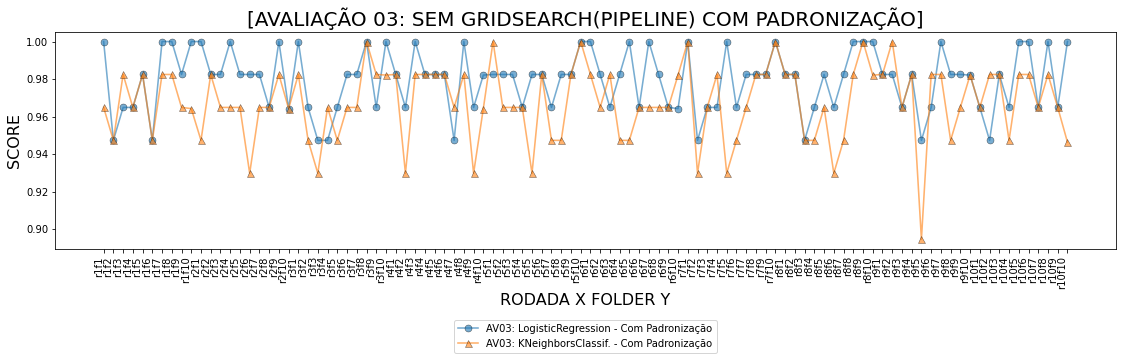

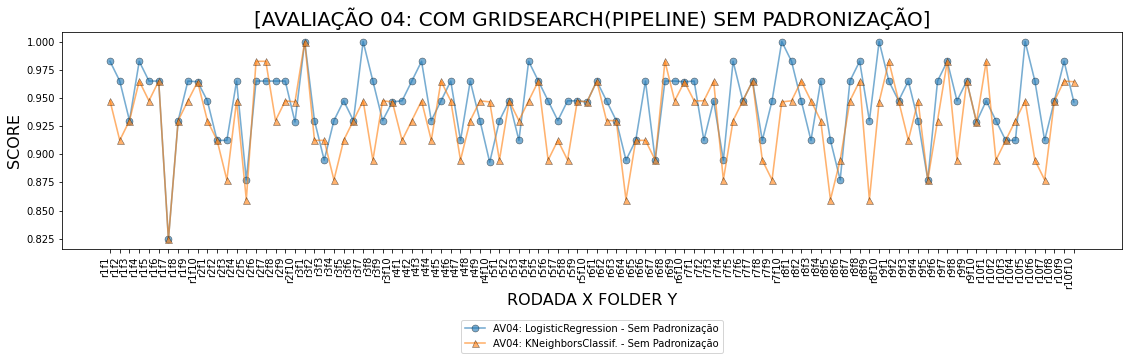

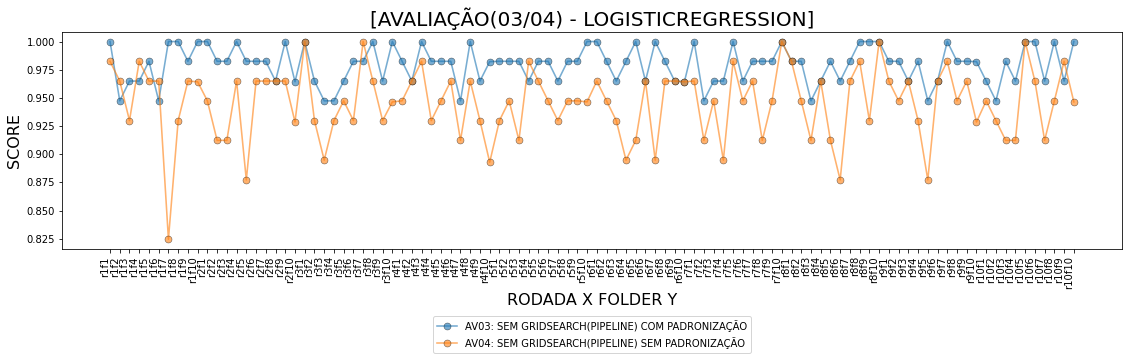

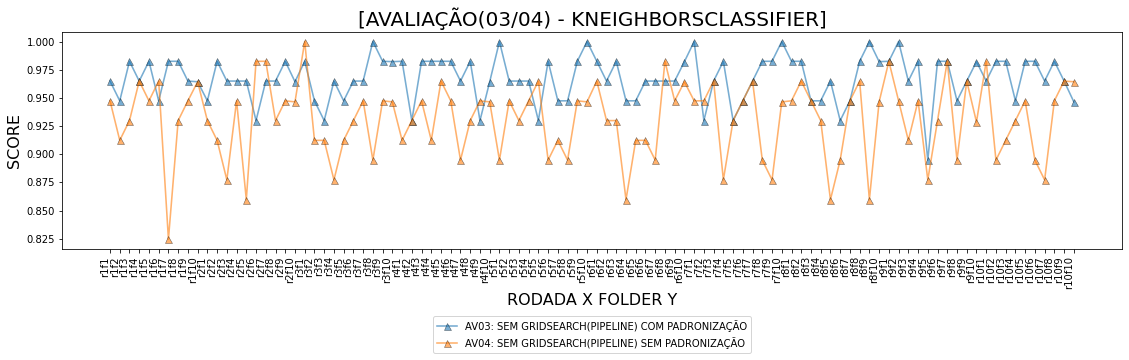

In [18]:
#---------------------------------------------------------------------------------
# GRAFICOS PARA A AVALIAÇÃO 03 E 04
#---------------------------------------------------------------------------------
margem = 130
tamanho=(19,4)

y0  = ['r1f1', 'r1f2', 'r1f3', 'r1f4', 'r1f5', 'r1f6', 'r1f7', 'r1f8', 'r1f9', 'r1f10',
       'r2f1', 'r2f2', 'r2f3', 'r2f4', 'r2f5', 'r2f6', 'r2f7', 'r2f8', 'r2f9', 'r2f10',
       'r3f1', 'r3f2', 'r3f3', 'r3f4', 'r3f5', 'r3f6', 'r3f7', 'r3f8', 'r3f9', 'r3f10',
       'r4f1', 'r4f2', 'r4f3', 'r4f4', 'r4f5', 'r4f6', 'r4f7', 'r4f8', 'r4f9', 'r4f10',
       'r5f1', 'r5f2', 'r5f3', 'r5f4', 'r5f5', 'r5f6', 'r5f7', 'r5f8', 'r5f9', 'r5f10',
       'r6f1', 'r6f2', 'r6f3', 'r6f4', 'r6f5', 'r6f6', 'r6f7', 'r6f8', 'r6f9', 'r6f10',
       'r7f1', 'r7f2', 'r7f3', 'r7f4', 'r7f5', 'r7f6', 'r7f7', 'r7f8', 'r7f9', 'r7f10',
       'r8f1', 'r8f2', 'r8f3', 'r8f4', 'r8f5', 'r8f6', 'r8f7', 'r8f8', 'r8f9', 'r8f10',
       'r9f1', 'r9f2', 'r9f3', 'r9f4', 'r9f5', 'r9f6', 'r9f7', 'r9f8', 'r9f9', 'r9f10',
       'r10f1', 'r10f2', 'r10f3', 'r10f4', 'r10f5', 'r10f6', 'r10f7', 'r10f8', 'r10f9', 'r10f10']

x1 = scoresLGR_c['test_score']
x2 = scoresKNN_c['test_score']
x3 = scoresLGR_s['test_score']
x4 = scoresKNN_s['test_score']

print('='*margem)
#---------------------------------------------------------------------------------
plt.figure(figsize=tamanho)
plt.title('[AVALIAÇÃO 03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO]', fontsize=20)

ax = plt.gca()
ax.set_xticklabels(y0, rotation=90, ha='right')

plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("RODADA X FOLDER Y", fontsize=16)

plt.plot(y0, x1, linewidth=1.6, linestyle='-', label='AV03: LogisticRegression - Com Padronização', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x2, linewidth=1.6, linestyle='-', label='AV03: KNeighborsClassif. - Com Padronização', marker='^', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))
plt.show()
#---------------------------------------------------------------------------------
print()
print('='*margem)
print()
print('='*margem)
#---------------------------------------------------------------------------------
plt.figure(figsize=tamanho)
plt.title('[AVALIAÇÃO 04: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO]', fontsize=20)

ax = plt.gca()
ax.set_xticklabels(y0, rotation=90, ha='right')

plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("RODADA X FOLDER Y", fontsize=16)

plt.plot(y0, x3, linewidth=1.6, linestyle='-', label='AV04: LogisticRegression - Sem Padronização', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x4, linewidth=1.6, linestyle='-', label='AV04: KNeighborsClassif. - Sem Padronização', marker='^', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))
plt.show()
#---------------------------------------------------------------------------------
print()
print('='*margem)
print()
print('='*margem)
#---------------------------------------------------------------------------------
plt.figure(figsize=tamanho)
plt.title('[AVALIAÇÃO(03/04) - LOGISTICREGRESSION]', fontsize=20)

ax = plt.gca()
ax.set_xticklabels(y0, rotation=90, ha='right')

plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("RODADA X FOLDER Y", fontsize=16)

plt.plot(y0, x1, linewidth=1.6, linestyle='-', label='AV03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x3, linewidth=1.6, linestyle='-', label='AV04: SEM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))
plt.show()
#---------------------------------------------------------------------------------
print()
print('='*margem)
print()
print('='*margem)
#---------------------------------------------------------------------------------
plt.figure(figsize=tamanho)
plt.title('[AVALIAÇÃO(03/04) - KNEIGHBORSCLASSIFIER]', fontsize=20)

ax = plt.gca()
ax.set_xticklabels(y0, rotation=90, ha='right')

plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("RODADA X FOLDER Y", fontsize=16)

plt.plot(y0, x2, linewidth=1.6, linestyle='-', label='AV03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO', marker='^', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)
plt.plot(y0, x4, linewidth=1.6, linestyle='-', label='AV04: SEM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO', marker='^', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.6)

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))
plt.show()
#---------------------------------------------------------------------------------
print()
print('='*margem)
print()

#---------------------------------------------------------------------------------

In [19]:
#---------------------------------------------------------------------------------
# ================================================================================

In [20]:
#===============================================================================
#                      TABELA COM SUMARIZAÇÃO DE RESULTADOS
#===============================================================================
import pandas as pd

A = ['AVALIAÇÃO 01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO', 
     'AVALIAÇÃO 02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO', 
     'AVALIAÇÃO 03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO',
     'AVALIAÇÃO 04: SEM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO']
B, C = [],[]

B.append(m1GP)
C.append(m2GP)

B.append(m3GP)
C.append(m4GP)

B.append(m1)
C.append(m2)

B.append(m3)
C.append(m4)

print("===============================================================================================")
print("                             TABELA COM SUMARIZAÇÃO DE RESULTADOS                              ")
print("===============================================================================================","\n")

df = pd.DataFrame(index=A)
df['LogisticRegression'] = B
df['KNeighborsClassif.'] = C

df

#---------------------------------------------------------------------------------

                             TABELA COM SUMARIZAÇÃO DE RESULTADOS                              



,LogisticRegression,KNeighborsClassif.
AVALIAÇÃO 01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO,0.979101,0.966269
AVALIAÇÃO 02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO,0.946588,0.932901
AVALIAÇÃO 03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO,0.979455,0.967503
AVALIAÇÃO 04: SEM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO,0.945179,0.930789


In [21]:
#---------------------------------------------------------------------------------
# ================================================================================

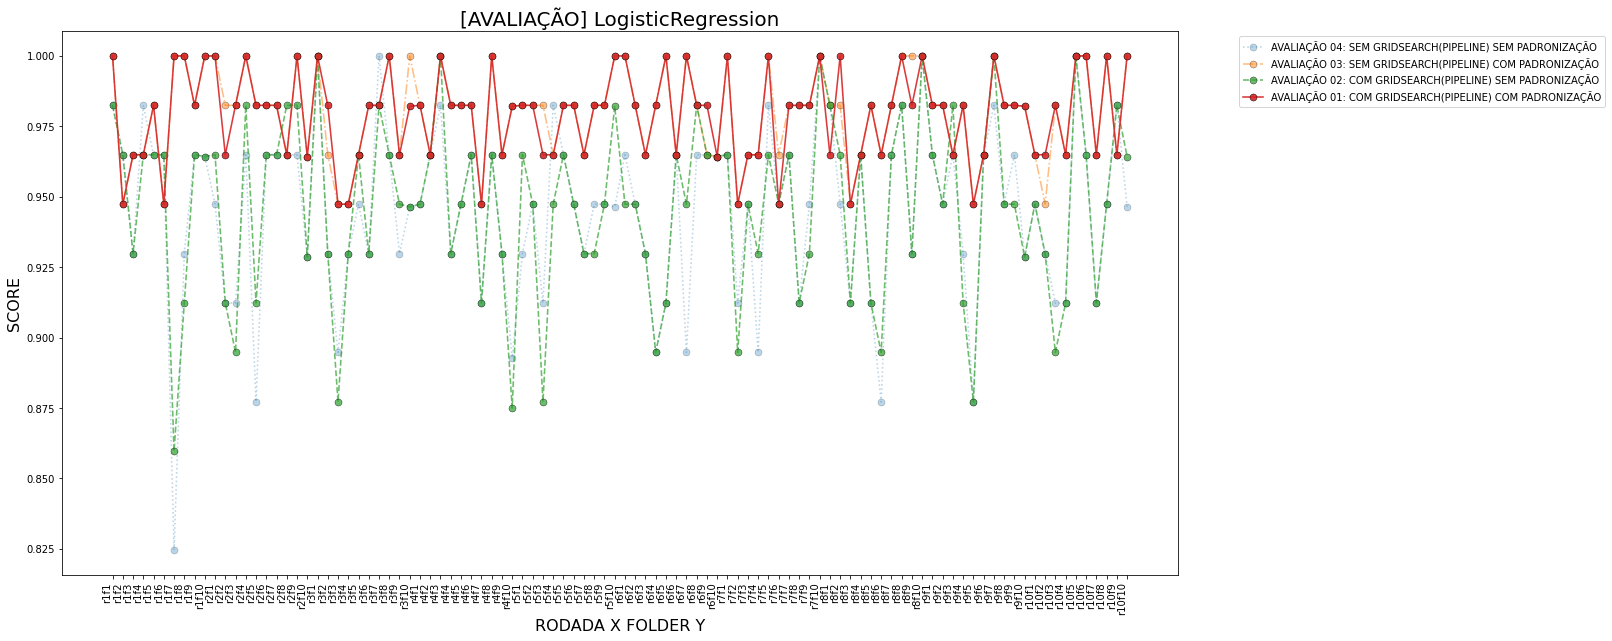

In [22]:
# ================================================================================
#                            GRAFICO - TODAS AVALIAÇÕES
# ================================================================================

#---------------------------------------------------------------------------------
#                           [ALIAÇÃO] LogisticRegression
#---------------------------------------------------------------------------------
plt.figure(figsize=(20,10))
plt.title('[AVALIAÇÃO] LogisticRegression', fontsize=20)

ax = plt.gca()
ax.set_xticklabels(y0, rotation=90, ha='right')

plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("RODADA X FOLDER Y", fontsize=16)

plt.plot(y0,   x3, linewidth=1.6, linestyle=':',  label='AVALIAÇÃO 04: SEM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.3)
plt.plot(y0,   x1, linewidth=1.6, linestyle='-.', label='AVALIAÇÃO 03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.5)
plt.plot(y0, x3GP, linewidth=1.6, linestyle='--', label='AVALIAÇÃO 02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.7)
plt.plot(y0, x1GP, linewidth=1.6, linestyle='-',  label='AVALIAÇÃO 01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.9)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()
#---------------------------------------------------------------------------------

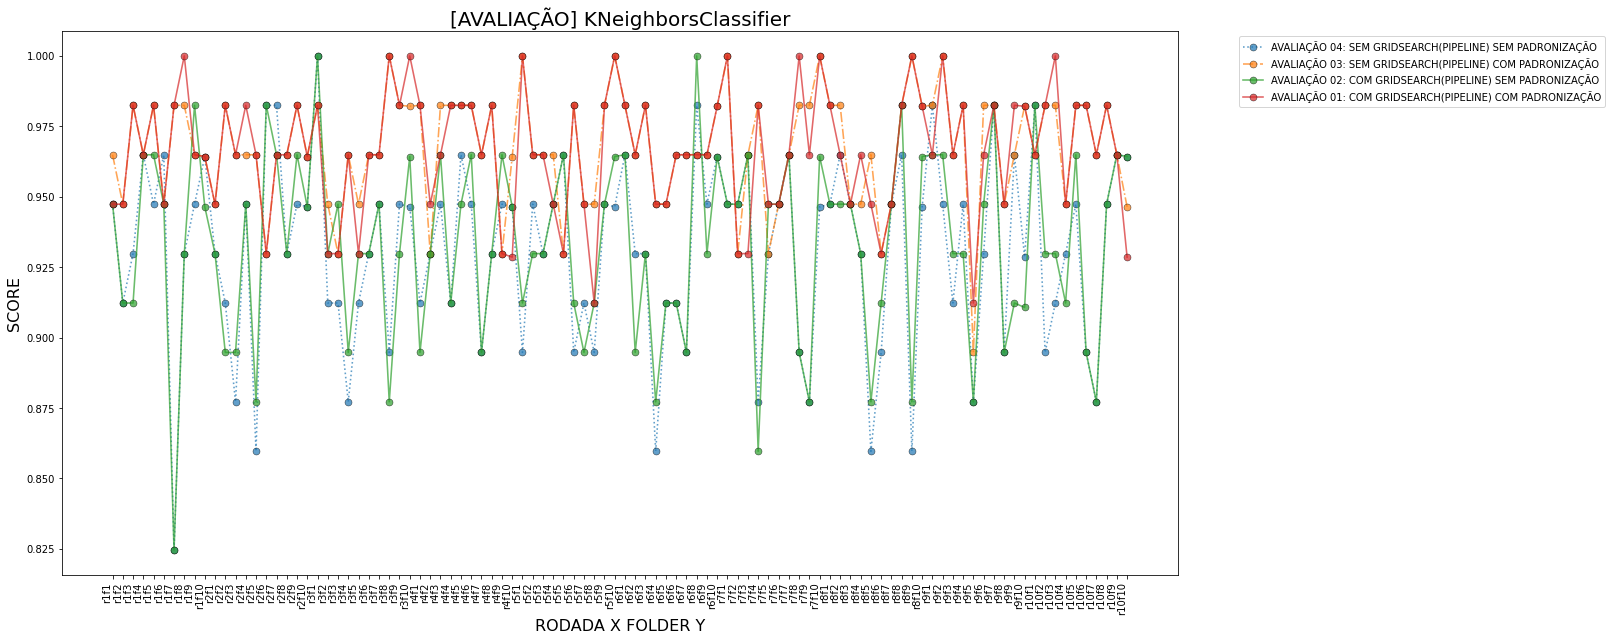

In [23]:
#---------------------------------------------------------------------------------
#                           [ALIAÇÃO] KNeighborsClassifier
#---------------------------------------------------------------------------------
plt.figure(figsize=(20,10))
plt.title('[AVALIAÇÃO] KNeighborsClassifier', fontsize=20)

ax = plt.gca()
ax.set_xticklabels(y0, rotation=90, ha='right')

plt.ylabel("SCORE",  fontsize=16)
plt.xlabel("RODADA X FOLDER Y", fontsize=16)

plt.plot(y0,   x4, linewidth=1.6, linestyle=':',  label='AVALIAÇÃO 04: SEM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.7)
plt.plot(y0,   x2, linewidth=1.6, linestyle='-.', label='AVALIAÇÃO 03: SEM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.7)
plt.plot(y0, x4GP, linewidth=1.6, linestyle='-',  label='AVALIAÇÃO 02: COM GRIDSEARCH(PIPELINE) SEM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.7)
plt.plot(y0, x2GP, linewidth=1.6, linestyle='-',  label='AVALIAÇÃO 01: COM GRIDSEARCH(PIPELINE) COM PADRONIZAÇÃO', marker='o', ms=7, markeredgecolor="black", markeredgewidth=0.5, alpha=0.7)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

#---------------------------------------------------------------------------------

In [24]:
# ================================================================================